# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib notebook
plt.style.use('ggplot')

# Make a dataframe of the training data (which I imagine is the smallest of the two)
df = pd.read_csv('train.csv')

In [19]:
# Look at a sample of the data just to see what it looks like...
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
# And now look at the info and some statistical properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [6]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


Wonderful. It looks like there are 333 entries for every series, so I don't think I'll have to worry about cleaning up the dataset. Additionally, it loks like every series is numerical. 

Now let's take a look all all of this data as a set of scatter plots and histograms using the matrix function:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118e3f518>,
      dtype=object)

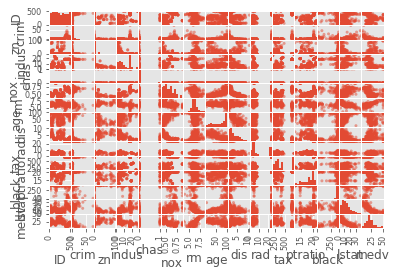

In [8]:
pd.plotting.scatter_matrix(df)

Well that wasn't terrible useful because there is SO MUCH DATA. I do want to see all of it, however, so the best thing to do would be to make the plot bigger.

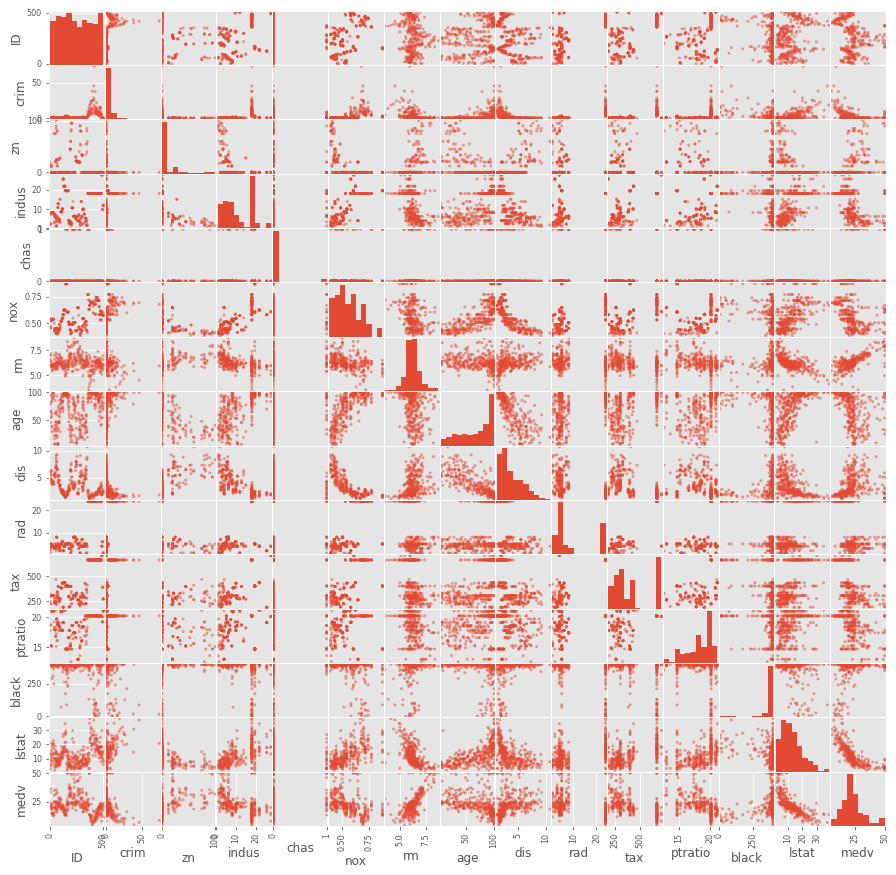

In [12]:
pd.plotting.scatter_matrix(
    df,
    figsize = [15,15],
    marker = '.',
);

There's a few interesting bits of information that pop out of this matrix. Let's start with a list on the variables that are (close to) normally distributed:
1. rm - Number of rooms per dwelling (discrete)
2. lstat - Percent of population considered "lower status" (continuous)
3. medv - The median value of the dwelling (continuous)
This may not tell us much by itself, but at least it's an interesting thing to note that not everything is normally distributed. In fact, it's interesting that almost nothing is normally distributed. Knowing this, we can choose to use those variables as a mechanism to split the dataset by choosing quantiles that perhaps express something else about the data. For example, choosing to look at the population that has a median value of the dwelling below the boston average. Or Looking at the population that has a majority of individuals as "lower status".
We continue the exploration by looking for clear monotonic trends in the scatter plots. We see plenty here:
0) X,Y
1) Crime, Median Value
2) Crime, Distance to Hiring Center
3) Industry Fraction, Distance to Hiring Center
4) Industry Distance, NOx Concentration
5) NOx, Distance to Hiring Center
6) NOx, Proportion of houses built before 1940
7) Room Number, Median House Value
8) Room Number, Proportion of individuals labeled as low status
9) Proportion of houses built before 1940, Distance to Hiring Center
10) Distance to Hiring center, NOx Concentration
There are a few others, but this is a good list to start with.
One final trend to mention that was not monotonic was a comparison of industry fraction vs crime rate. There's this really interesting bump that occurs at about 3/4 of the max industry fraction. Perhaps something to investigate.

In any case, let's start cleaving the dataset in order to make some comparisons. I'll cleave by the following:
1) Bordering the river or not (easy) (df_river_1 | dv_river_0)
2) 50th percentile of median value (df_medv_low | df_medv_high)
3) 75th percentile of lower status (df_lstat_low | df_lstat_high)

In [25]:
df_river_1 = df.loc[df['chas'] == 1]
df_river_0 = df.loc[df['chas'] == 0]

df_medv_low = df.loc[df['medv'] < df['medv'].quantile(0.5)]
df_medv_high = df.loc[df['medv'] >= df['medv'].quantile(0.5)]

df_lstat_low = df.loc[df['lstat'] < df['lstat'].quantile(0.9)]
df_lstat_high = df.loc[df['lstat'] >= df['lstat'].quantile(0.9)]

Now we can do a quick and dirty analysis of the river data simply by looking at its statistical information

In [26]:
df_river_1.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,255.600000,2.163972,8.500000,12.330000,1.0,0.593595,6.577750,75.815000,3.069540,9.900000,394.550000,17.38500,380.681000,11.118000,30.175000
std,75.913663,2.885734,21.830688,6.505255,0.0,0.146237,0.814341,22.808638,1.343724,8.534142,171.795005,2.22906,21.661541,7.198281,12.362204
min,143.000000,0.015010,0.000000,1.210000,1.0,0.401000,5.403000,24.800000,1.129600,1.000000,198.000000,13.60000,321.020000,2.960000,13.400000
25%,211.250000,0.200377,0.000000,6.200000,1.0,0.489000,6.111250,58.325000,2.041250,4.750000,276.750000,14.85000,377.565000,5.007500,21.700000
50%,236.000000,0.572070,0.000000,12.240000,1.0,0.528500,6.322500,86.000000,3.080050,5.000000,307.000000,17.40000,390.580000,9.735000,26.050000
75%,302.250000,3.453213,0.000000,18.100000,1.0,0.693500,6.913250,92.925000,4.095200,12.000000,468.750000,19.00000,395.240000,14.775000,37.900000
max,373.000000,8.982960,90.000000,19.580000,1.0,0.871000,8.375000,100.000000,5.885000,24.000000,666.000000,20.20000,396.900000,26.820000,50.000000


In [27]:
df_river_0.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,313.000000,313.000000,313.000000,313.000000,313.0,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,250.654952,3.436787,10.829073,11.227252,0.0,0.554815,6.245674,67.741534,3.750853,9.616613,410.220447,18.515974,358.110511,12.604728,22.295527
std,151.365227,7.544289,22.754198,7.032974,0.0,0.112555,0.693026,28.400933,2.009606,8.768386,171.014186,2.132487,88.984202,7.061663,8.746397
min,1.000000,0.006320,0.000000,0.740000,0.0,0.385000,3.561000,6.000000,1.137000,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,118.000000,0.078750,0.000000,4.950000,0.0,0.453000,5.879000,43.700000,2.132900,4.000000,281.000000,17.400000,376.700000,7.220000,17.200000
50%,245.000000,0.245220,0.000000,9.690000,0.0,0.538000,6.185000,76.500000,3.092300,5.000000,330.000000,19.100000,392.230000,11.220000,21.200000
75%,387.000000,3.678220,12.500000,18.100000,0.0,0.624000,6.563000,93.800000,5.214600,24.000000,666.000000,20.200000,396.330000,16.440000,24.700000
max,506.000000,73.534100,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


A quick look at the data reveals that there are differences in the crime rates and the median values between the two datasets. Let's plot these:

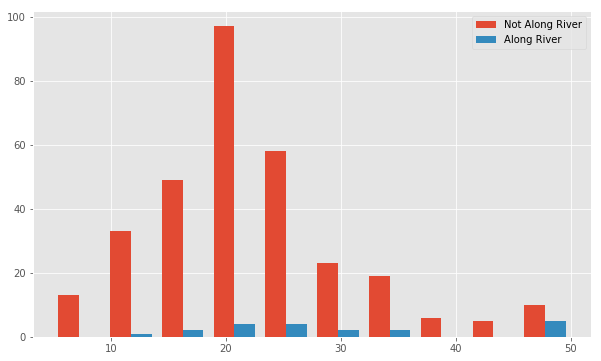

In [41]:
plt.figure(figsize=(10,6));

plt.hist([df_river_0['medv'],df_river_1['medv']],label=['Not Along River','Along River']);
plt.legend(loc='upper right');

With this much data it's hard to tell if there is a statistically significant difference. It appears that the peak of the normal curve for the data representing the townships along the river occurs between $200k-250k, whereas it's clear that for the data that represents the townships not along the river the peak is at $200k. 
It's also clear that the proportion of houses in the $500k and greater bin is more pronounced in townships near the river. A boxplot might help clear this up:

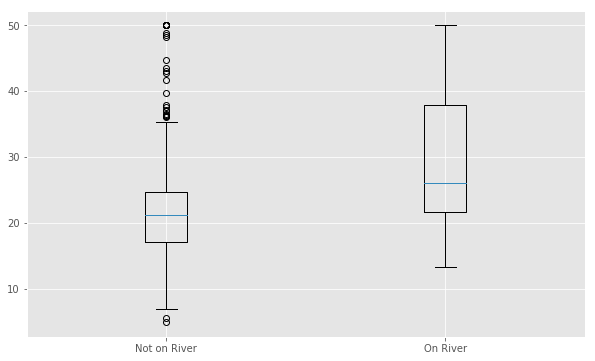

In [53]:
fig1 = plt.figure(figsize=(10,6));
ax1 = plt.axes()
ax1.boxplot([df_river_0['medv'],df_river_1['medv']]);
plt.xticks([1,2],['Not on River', 'On River']);





This is a clearer representation of the differences in the data. The mean of the houses in townships along the river is equal to the 75th percentile of the houses in townships not along the river.

The data was also cleaved by median house value in the townships, which allows us to look at how crime might impact the median value. We'll do the same analysis for crime in the two subset groups. First, we'll look at the metadata:

In [54]:
df_medv_low.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,282.807229,5.858080,2.858434,14.880422,0.024096,0.609964,5.925120,82.278313,3.035616,12.686747,487.078313,19.416867,334.226386,17.291265,16.261446
std,168.987642,9.593864,12.194739,6.253777,0.153812,0.112783,0.470839,20.354480,1.726155,9.858302,175.446927,1.764005,113.777049,6.349087,3.977538
min,11.000000,0.013600,0.000000,1.690000,0.000000,0.385000,4.138000,18.500000,1.137000,1.000000,188.000000,14.700000,3.500000,6.750000,5.000000
25%,120.500000,0.171493,0.000000,8.560000,0.000000,0.538000,5.713000,74.575000,1.838475,4.000000,307.000000,18.700000,349.722500,12.957500,13.650000
50%,339.500000,1.513335,0.000000,18.100000,0.000000,0.601000,5.967000,91.200000,2.394300,5.000000,437.000000,20.200000,389.680000,16.225000,17.400000
75%,440.750000,8.236213,0.000000,18.100000,0.000000,0.698250,6.211250,97.075000,3.797550,24.000000,666.000000,20.200000,396.900000,20.577500,19.500000
max,506.000000,73.534100,80.000000,27.740000,1.000000,0.871000,7.393000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,21.500000


In [56]:
df_medv_high.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,219.287425,0.877559,18.473054,7.728024,0.095808,0.504641,6.604078,54.258683,4.380214,6.598802,331.946108,17.485030,384.554671,7.768204,29.237126
std,115.397537,2.045483,27.535424,5.780841,0.295213,0.090678,0.734546,27.882473,1.995332,6.137049,125.334120,2.072704,29.262083,3.789257,8.254852
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,131.420000,1.730000,21.600000
25%,160.500000,0.053370,0.000000,3.440000,0.000000,0.436000,6.163000,31.350000,2.759400,4.000000,264.000000,16.050000,385.860000,5.090000,23.250000
50%,224.000000,0.113290,0.000000,5.860000,0.000000,0.489000,6.546000,53.600000,3.945400,5.000000,296.000000,17.800000,392.850000,7.200000,25.000000
75%,293.500000,0.520360,25.000000,10.590000,0.000000,0.538000,6.981000,79.900000,5.640700,7.000000,346.500000,19.100000,395.630000,9.605000,32.800000
max,504.000000,13.522200,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,24.000000,666.000000,21.000000,396.900000,29.550000,50.000000


A quick look at the data shows that there are several factors that have significantly different metadata between the two. Crime rate is clearly different, as is fraction of industry land in the township, the proportion of old homes, the distance to hiring centers, the pupil to teacher ratio, and, not surprisingly, the fraction of the population considered "low status". Let's take a look at some of these below:

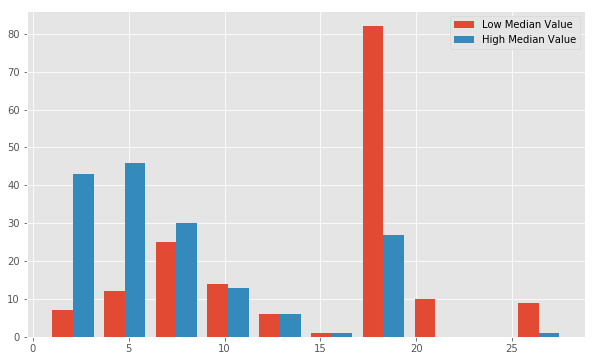

In [61]:
plt.figure(figsize=(10,6));

plt.hist([df_medv_low['indus'],df_medv_high['indus']],label=['Low Median Value','High Median Value']);
plt.legend(loc='upper right');

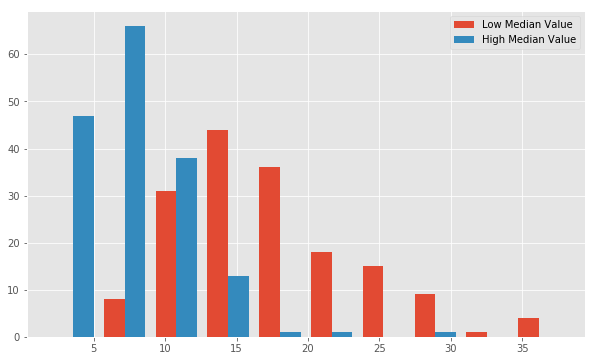

In [63]:
plt.figure(figsize=(10,6));

plt.hist([df_medv_low['lstat'],df_medv_high['lstat']],label=['Low Median Value','High Median Value']);
plt.legend(loc='upper right');

We could also take a look at some boxplots to learn a few more things:

Text(0.5,1,'Pupil to Teacher Ratio')

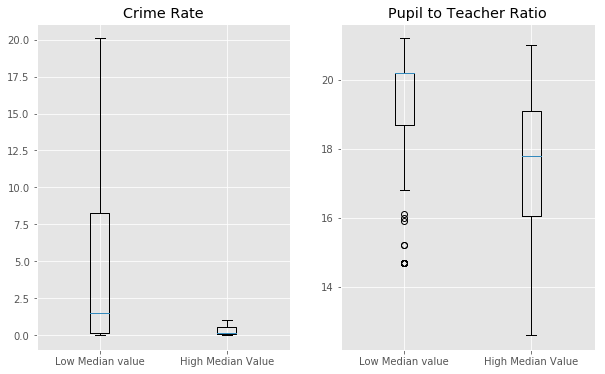

In [75]:
fig1 = plt.figure(figsize=(10,6));
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)
ax1.boxplot([df_medv_low['crim'],df_medv_high['crim']],showfliers = False);
ax2.boxplot([df_medv_low['ptratio'],df_medv_high['ptratio']])


ax1.set_xticklabels(['Low Median value', 'High Median Value']);
ax1.set_title('Crime Rate')

ax2.set_xticklabels(['Low Median value', 'High Median Value']);
ax2.set_title('Pupil to Teacher Ratio')


Finally, let's take a look at the datasets that were cleaved by "lower status" population at the 90th percentile. First we look at its metadata:

In [76]:
df_lstat_low.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,241.511706,2.351326,11.904682,10.487826,0.060201,0.542619,6.351441,65.346823,3.923753,8.735786,391.220736,18.334783,367.557960,10.809064,23.996656
std,146.984621,6.071408,23.628098,6.834341,0.238257,0.107955,0.658431,27.810104,1.967790,8.197259,162.214100,2.158904,73.767321,5.021084,8.777889
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,7.200000
25%,113.500000,0.069020,0.000000,4.860000,0.000000,0.448000,5.964000,40.800000,2.350600,4.000000,276.500000,16.950000,378.365000,6.635000,19.000000
50%,233.000000,0.206080,0.000000,8.140000,0.000000,0.520000,6.240000,71.700000,3.331700,5.000000,311.000000,18.600000,392.300000,10.160000,22.200000
75%,355.000000,1.728440,20.000000,18.100000,0.000000,0.605000,6.630500,91.100000,5.287300,8.000000,437.000000,20.200000,396.100000,14.555000,26.600000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,22.110000,50.000000


In [78]:
df_lstat_high.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,34.000000,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,333.970588,12.233746,0.0,18.378529,0.058824,0.684882,5.510882,93.550000,1.829582,17.529412,568.088235,19.444118,288.305294,27.521471,11.970588
std,130.175752,10.982354,0.0,3.649095,0.238833,0.094770,0.645728,15.585818,0.679805,9.516287,164.564138,1.832070,143.084554,4.063328,4.127185
min,31.000000,0.150380,0.0,8.140000,0.000000,0.489000,4.138000,9.800000,1.137000,2.000000,188.000000,14.700000,7.680000,22.600000,5.000000
25%,212.750000,2.371300,0.0,18.100000,0.000000,0.635000,5.050250,93.950000,1.462400,5.000000,411.500000,20.125000,189.812500,24.157500,8.725000
50%,387.500000,10.889950,0.0,18.100000,0.000000,0.693000,5.486500,97.000000,1.652850,24.000000,666.000000,20.200000,359.730000,26.705000,11.900000
75%,419.500000,17.528525,0.0,18.100000,0.000000,0.713500,5.886000,100.000000,1.906100,24.000000,666.000000,20.200000,396.900000,29.545000,13.875000
max,491.000000,45.746100,0.0,27.740000,1.000000,0.871000,6.824000,100.000000,4.233000,24.000000,711.000000,21.200000,396.900000,37.970000,23.700000


Just for the hell of it, let's look at some scatter plots instead. Let's look to see if crime is a predictor of median value in these two datasets. My prediction is that it will be a predictor in the lower 90%, but it won't be a predictor in the highest 10%.

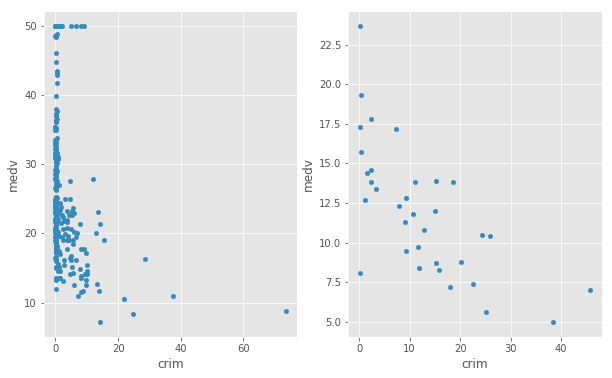

In [83]:
fig1 = plt.figure(figsize = (10,6))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

df_lstat_low.plot.scatter('crim','medv', ax = ax1);
df_lstat_high.plot.scatter('crim','medv', ax = ax2)

So I was wrong, the crime rate is predictor for median value even in townships with high "low status" individuals. It may be the case, however, that crime is not a good predictor of median value below a certain threshold.
Let's look at another predictor for kicks:

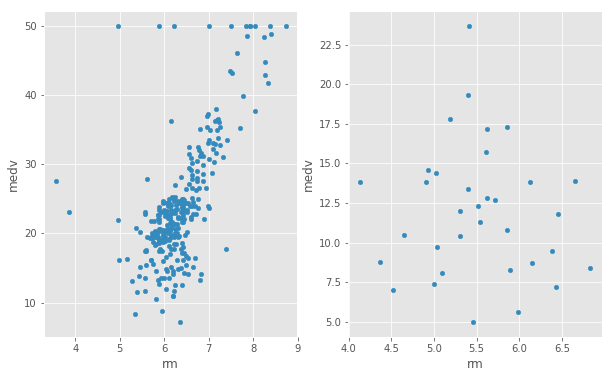

In [84]:
fig1 = plt.figure(figsize = (10,6))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

df_lstat_low.plot.scatter('rm','medv', ax = ax1);
df_lstat_high.plot.scatter('rm','medv', ax = ax2)

The number of rooms in a dwelling certainly matters for the townships with lower fractions of "low status" individuals, but it doesn't seem to matter much for townships with high fracations of "low status" individuals. This is good to know, since it tells us that crime is a good predictor of value but the number of rooms is not.